<a href="https://colab.research.google.com/github/Rohan-Kumar-Singh/Sentiment-analysis-of-informal-text/blob/master/training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf

# Get the GPU device name.
device_name = tf.test.gpu_device_name()

# The device name should look like the following:
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    raise SystemError('GPU device not found')

Found GPU at: /device:GPU:0


In [ ]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla K80


In [ ]:
!pip install transformers

     |████████████████████████████████| 4.0 MB 5.3 MB/s 
     |████████████████████████████████| 6.6 MB 33.7 MB/s 
     |████████████████████████████████| 880 kB 41.0 MB/s 
     |████████████████████████████████| 77 kB 6.1 MB/s 
     |████████████████████████████████| 596 kB 42.0 MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895260 sha256=62c43bebffee65f47e0a06c90f49c1068ccfb3f5aa98fa5f20dd85edbc7a7e22
  Stored in directory: /root/.cache/pip/wheels/87/39/dd/a83eeef36d0bf98e7a4d1933a4ad2d660295a40613079bafc9
Successfully built sacremoses
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
import pandas as pd
# import pytreebank

# Load the dataset into a pandas dataframe.
df = pd.read_csv('/content/drive/MyDrive/major-final/twitter_data_final.csv', lineterminator='\n')
# Report the number of sentences.
print('Number of training sentences: {:,}\n'.format(df.shape[0]))
# df['truth'] = df['truth'].str.replace('__label__', '')
# df['truth'] = df['truth'].astype(int).astype('category')
df

Number of training sentences: 21,213



,User,Tweet,cleaned_tweets,target
0,TanseemHaider,RT @aajtak: जैकलीन फर्नांडीस ने कोर्ट से 15 दि...,RT जैकलीन फर्नांडीस ने कोर्ट से दिन के विदेश...,Neutral
1,sanjayyadav782,RT @OpIndia_in: ‘बॉलीवुड मुझे अफॉर्ड नहीं कर स...,RT ‘बॉलीवुड मुझे अफॉर्ड नहीं कर सकता उनकी फ़ि...,Negative
2,chetanjoshi_,RT @thepaltan_: संवेदनशील मुद्दों पर सृजनात्मक...,RT संवेदनशील मुद्दों पर सृजनात्मक प्रहार करता...,Neutral
3,thepaltan_,संवेदनशील मुद्दों पर सृजनात्मक प्रहार करता सिन...,संवेदनशील मुद्दों पर सृजनात्मक प्रहार करता सिन...,Neutral
4,RajivSanatni,RT @rowdy_pandit: 💥जब दिखेगा तभी तो बिकेगा!!🤓🙂...,RT 💥जब दिखेगा तभी तो बिकेगा🤓🙂🙂 💥👉Simple logic...,Positive
...,...,...,...,...
21208,JuliusFlywheel,RT @redrabbleroz: I honestly still cannot get ...,RT I honestly still cannot get over this How ...,Negative
21209,gordonm25443977,RT @toryman1979: https://t.co/QDwRYKgtm7\nTwin...,RT Twin girls found safe and well after goi...,Neutral
21210,phorlerkemii,RT @Gistloversblog1: The comment I was looking...,RT The comment I was looking for Firstly she ...,Neutral
21211,Yashika_SidNaaz,"RT @filmibeat: Tejasswi Prakash, Shehnaaz Gill...",RT Tejasswi Prakash Shehnaaz Gill amp Anushka...,Positive


In [ ]:
df.rename(columns={'target': 'sentiment'}, inplace=True)

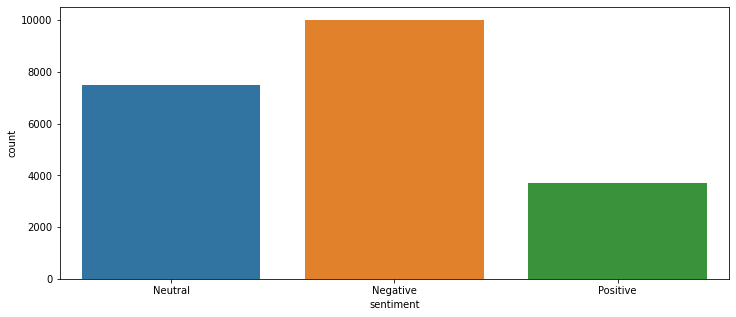

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig_dims = (12, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(data=df, x="sentiment")

In [ ]:
def label(sentiment):
  if sentiment == 'Negative':
    return 0
  elif sentiment == 'Neutral':
    return 1
  else:
    return 2
df['label'] = df['sentiment'].apply(label)
df

,User,Tweet,cleaned_tweets,sentiment,label
0,TanseemHaider,RT @aajtak: जैकलीन फर्नांडीस ने कोर्ट से 15 दि...,RT जैकलीन फर्नांडीस ने कोर्ट से दिन के विदेश...,Neutral,1
1,sanjayyadav782,RT @OpIndia_in: ‘बॉलीवुड मुझे अफॉर्ड नहीं कर स...,RT ‘बॉलीवुड मुझे अफॉर्ड नहीं कर सकता उनकी फ़ि...,Negative,0
2,chetanjoshi_,RT @thepaltan_: संवेदनशील मुद्दों पर सृजनात्मक...,RT संवेदनशील मुद्दों पर सृजनात्मक प्रहार करता...,Neutral,1
3,thepaltan_,संवेदनशील मुद्दों पर सृजनात्मक प्रहार करता सिन...,संवेदनशील मुद्दों पर सृजनात्मक प्रहार करता सिन...,Neutral,1
4,RajivSanatni,RT @rowdy_pandit: 💥जब दिखेगा तभी तो बिकेगा!!🤓🙂...,RT 💥जब दिखेगा तभी तो बिकेगा🤓🙂🙂 💥👉Simple logic...,Positive,2
...,...,...,...,...,...
21208,JuliusFlywheel,RT @redrabbleroz: I honestly still cannot get ...,RT I honestly still cannot get over this How ...,Negative,0
21209,gordonm25443977,RT @toryman1979: https://t.co/QDwRYKgtm7\nTwin...,RT Twin girls found safe and well after goi...,Neutral,1
21210,phorlerkemii,RT @Gistloversblog1: The comment I was looking...,RT The comment I was looking for Firstly she ...,Neutral,1
21211,Yashika_SidNaaz,"RT @filmibeat: Tejasswi Prakash, Shehnaaz Gill...",RT Tejasswi Prakash Shehnaaz Gill amp Anushka...,Positive,2


In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df.sentiment = encoder.fit_transform(df.label)

In [ ]:
# Get the lists of sentences and their labels.
sentences = df.Tweet.values
labels = df.label.values
labels

array([1, 0, 1, ..., 1, 2, 0])

In [ ]:
!pip install SentencePiece

     |████████████████████████████████| 1.2 MB 5.3 MB/s 


In [ ]:
from transformers import XLMRobertaTokenizer

# Load the BERT tokenizer.
print('Loading XLMRobertaTokenizer ...')


Loading XLMRobertaTokenizer ...


In [ ]:
from transformers import AutoTokenizer, AutoModelForMaskedLM, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained('xlm-roberta-base')

Downloading:   0%|          | 0.00/615 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.83M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/8.68M [00:00<?, ?B/s]

In [ ]:
# Print the original sentence.
print(' Original: ', sentences[0])

# Print the sentence split into tokens.
print('Tokenized: ', tokenizer.tokenize(sentences[0]))

# Print the sentence mapped to token ids.
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(sentences[0])))

 Original:  RT @aajtak: जैकलीन फर्नांडीस ने कोर्ट से 15 दिन के विदेश टूर पर जाने की इजाजत मांगी 
#JacquelineFernandez (@MunishPandeyy/@TanseemHaider)
h…
Tokenized:  ['▁RT', '▁@', 'a', 'aj', 'tak', ':', '▁जै', 'कल', 'ीन', '▁फर्', 'ना', 'ंडी', 'स', '▁ने', '▁कोर्ट', '▁से', '▁15', '▁दिन', '▁के', '▁विदेश', '▁ट', 'ूर', '▁पर', '▁जाने', '▁की', '▁इ', 'जा', 'ज', 'त', '▁मांग', 'ी', '▁#', 'Ja', 'c', 'que', 'line', 'Fer', 'nan', 'dez', '▁(@', 'Mu', 'nish', 'P', 'ande', 'yy', '/', '@', 'T', 'anse', 'em', 'H', 'aider', ')', '▁h', '...']
Token IDs:  [27389, 1374, 11, 1122, 1865, 12, 127096, 28998, 32154, 106103, 1748, 106870, 1472, 1142, 43146, 646, 423, 3927, 287, 44893, 19315, 51303, 968, 13325, 471, 6698, 10886, 2410, 996, 45852, 659, 468, 6979, 238, 944, 2256, 89742, 4458, 26916, 41895, 10685, 78183, 683, 4431, 34034, 64, 981, 618, 20540, 195, 841, 135011, 16, 1096, 27]


In [ ]:
import torch

In [ ]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for sent in sentences:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 128,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

# Print sentence 0, now as a list of IDs.
print('Original: ', sentences[0])
print('Token IDs:', input_ids[0])
print('labels:', labels)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2269: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


Original:  RT @aajtak: जैकलीन फर्नांडीस ने कोर्ट से 15 दिन के विदेश टूर पर जाने की इजाजत मांगी 
#JacquelineFernandez (@MunishPandeyy/@TanseemHaider)
h…
Token IDs: tensor([     0,  27389,   1374,     11,   1122,   1865,     12, 127096,  28998,
         32154, 106103,   1748, 106870,   1472,   1142,  43146,    646,    423,
          3927,    287,  44893,  19315,  51303,    968,  13325,    471,   6698,
         10886,   2410,    996,  45852,    659,    468,   6979,    238,    944,
          2256,  89742,   4458,  26916,  41895,  10685,  78183,    683,   4431,
         34034,     64,    981,    618,  20540,    195,    841, 135011,     16,
          1096,     27,      2,      1,      1,      1,      1,      1,      1,
             1,      1,      1,      1,      1,      1,      1,      1,      1,
             1,      1,      1,      1,      1,      1,      1,      1,      1,
             1,      1,      1,      1,      1,      1,      1,      1,      1,
             1,      1,      1,      

In [ ]:
from torch.utils.data import TensorDataset, random_split

# Combine the training inputs into a TensorDataset.
dataset = TensorDataset(input_ids, attention_masks, labels)

# Create a 90-10 train-validation split.

# Calculate the number of samples to include in each set.
train_size = int(0.7 * len(dataset))
val_size = len(dataset) - train_size

# Divide the dataset by randomly selecting samples.
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

print('{:>5,} training samples'.format(train_size))
print('{:>5,} validation samples'.format(val_size))

14,849 training samples
6,364 validation samples


In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

# The DataLoader needs to know our batch size for training, so we specify it 
# here. For fine-tuning BERT on a specific task, the authors recommend a batch 
# size of 16 or 32.
batch_size = 32

# Create the DataLoaders for our training and validation sets.
# We'll take training samples in random order. 
train_dataloader = DataLoader(
            train_dataset,  # The training samples.
            sampler = RandomSampler(train_dataset), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )

# For validation the order doesn't matter, so we'll just read them sequentially.
validation_dataloader = DataLoader(
            val_dataset, # The validation samples.
            sampler = SequentialSampler(val_dataset), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
        )

In [ ]:
from transformers import XLMRobertaForSequenceClassification, AdamW, BertConfig

# Load BertForSequenceClassification, the pretrained BERT model with a single 
# linear classification layer on top. 
model = XLMRobertaForSequenceClassification.from_pretrained(
    "xlm-roberta-base", # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = 3, # The number of output labels--2 for binary classification.
                    # You can increase this for multi-class tasks.   
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.
)

# Tell pytorch to run this model on the GPU.
model.cuda()

Downloading:   0%|          | 0.00/1.04G [00:00<?, ?B/s]

Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForSequenceClassification: ['lm_head.layer_norm.bias', 'roberta.pooler.dense.weight', 'lm_head.layer_norm.weight', 'roberta.pooler.dense.bias', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.bias', 'lm_head.decoder.weight']
- This IS expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.out_p

XLMRobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(250002, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0): RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (La

In [ ]:
# Get all of the model's parameters as a list of tuples.
params = list(model.named_parameters())

print('The XLMRoberta model has {:} different named parameters.\n'.format(len(params)))

print('==== Embedding Layer ====\n')

for p in params[0:5]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== First Transformer ====\n')

for p in params[5:21]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== Output Layer ====\n')

for p in params[-4:]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

The XLMRoberta model has 201 different named parameters.

==== Embedding Layer ====

roberta.embeddings.word_embeddings.weight               (250002, 768)
roberta.embeddings.position_embeddings.weight             (514, 768)
roberta.embeddings.token_type_embeddings.weight             (1, 768)
roberta.embeddings.LayerNorm.weight                           (768,)
roberta.embeddings.LayerNorm.bias                             (768,)

==== First Transformer ====

roberta.encoder.layer.0.attention.self.query.weight       (768, 768)
roberta.encoder.layer.0.attention.self.query.bias             (768,)
roberta.encoder.layer.0.attention.self.key.weight         (768, 768)
roberta.encoder.layer.0.attention.self.key.bias               (768,)
roberta.encoder.layer.0.attention.self.value.weight       (768, 768)
roberta.encoder.layer.0.attention.self.value.bias             (768,)
roberta.encoder.layer.0.attention.output.dense.weight     (768, 768)
roberta.encoder.layer.0.attention.output.dense.bias     

In [ ]:
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


In [ ]:
from transformers import get_linear_schedule_with_warmup

# Number of training epochs. The BERT authors recommend between 2 and 4. 
# We chose to run for 4, but we'll see later that this may be over-fitting the
# training data.
epochs = 4

# Total number of training steps is [number of batches] x [number of epochs]. 
# (Note that this is not the same as the number of training samples).
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [ ]:
import random
import numpy as np

# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128

# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# We'll store a number of quantities such as training and validation loss, 
# validation accuracy, and timings.
training_stats = []

# Measure the total training time for the whole run.
total_t0 = time.time()

# For each epoch...
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_train_loss = 0

    # Put the model into training mode. Don't be mislead--the call to 
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the 
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because 
        # accumulating the gradients is "convenient while training RNNs". 
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        model.zero_grad()        

        # Perform a forward pass (evaluate the model on this training batch).
        # The documentation for this `model` function is here: 
        # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
        # It returns different numbers of parameters depending on what arguments
        # arge given and what flags are set. For our useage here, it returns
        # the loss (because we provided labels) and the "logits"--the model
        # outputs prior to activation.
        loss, logits = model(b_input_ids, 
                             token_type_ids=None, 
                             attention_mask=b_input_mask, 
                             labels=b_labels, return_dict=False)

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value 
        # from the tensor.
        total_train_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)            
    
    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))
        
    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables 
    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:
        
        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using 
        # the `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        
        # Tell pytorch not to bother with constructing the compute graph during
        # the forward pass, since this is only needed for backprop (training).
        with torch.no_grad():        

            # Forward pass, calculate logit predictions.
            # token_type_ids is the same as the "segment ids", which 
            # differentiates sentence 1 and 2 in 2-sentence tasks.
            # The documentation for this `model` function is here: 
            # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
            # Get the "logits" output by the model. The "logits" are the output
            # values prior to applying an activation function like the softmax.
            (loss, logits) = model(b_input_ids, 
                                   token_type_ids=None, 
                                   attention_mask=b_input_mask,
                                   labels=b_labels, return_dict=False)
            
        # Accumulate the validation loss.
        total_eval_loss += loss.item()

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences, and
        # accumulate it over all batches.
        total_eval_accuracy += flat_accuracy(logits, label_ids)

        
        

    # Report the final accuracy for this validation run.
    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(validation_dataloader)
    
    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0)
    
    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))

    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))


======== Epoch 1 / 4 ========
Training...
  Batch    40  of    465.    Elapsed: 0:00:55.
  Batch    80  of    465.    Elapsed: 0:01:51.
  Batch   120  of    465.    Elapsed: 0:02:47.
  Batch   160  of    465.    Elapsed: 0:03:42.
  Batch   200  of    465.    Elapsed: 0:04:38.
  Batch   240  of    465.    Elapsed: 0:05:33.
  Batch   280  of    465.    Elapsed: 0:06:28.
  Batch   320  of    465.    Elapsed: 0:07:24.
  Batch   360  of    465.    Elapsed: 0:08:19.
  Batch   400  of    465.    Elapsed: 0:09:15.
  Batch   440  of    465.    Elapsed: 0:10:11.

  Average training loss: 0.65
  Training epcoh took: 0:10:44

Running Validation...
  Accuracy: 0.82
  Validation Loss: 0.45
  Validation took: 0:01:30

======== Epoch 2 / 4 ========
Training...
  Batch    40  of    465.    Elapsed: 0:00:55.
  Batch    80  of    465.    Elapsed: 0:01:51.
  Batch   120  of    465.    Elapsed: 0:02:47.
  Batch   160  of    465.    Elapsed: 0:03:42.
  Batch   200  of    465.    Elapsed: 0:04:37.
  Batch  

In [ ]:
import matplotlib.pyplot as plt
% matplotlib inline

import pandas as pd

# Display floats with two decimal places.
pd.set_option('precision', 2)

# Create a DataFrame from our training statistics.
df_stats = pd.DataFrame(data=training_stats)

# Use the 'epoch' as the row index.
df_stats = df_stats.set_index('epoch')

# A hack to force the column headers to wrap.
#df = df.style.set_table_styles([dict(selector="th",props=[('max-width', '70px')])])

# Display the table.
df_stats

,Training Loss,Valid. Loss,Valid. Accur.,Training Time,Validation Time
epoch,,,,,
1,0.65,0.45,0.82,0:10:44,0:01:30
2,0.39,0.39,0.84,0:10:44,0:01:31
3,0.27,0.42,0.84,0:10:44,0:01:31
4,0.19,0.45,0.85,0:10:44,0:01:31


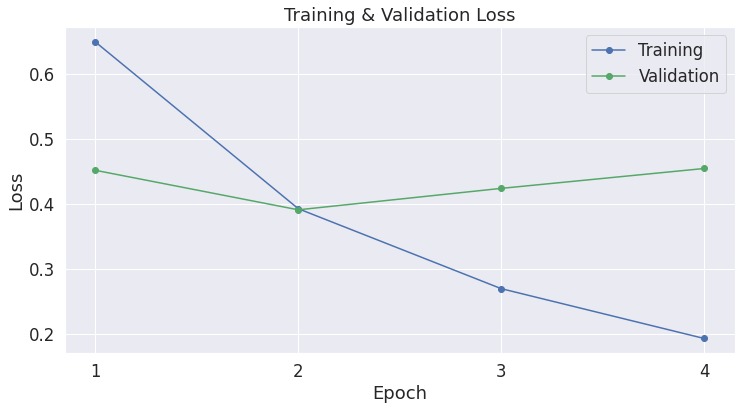

In [ ]:
import matplotlib.pyplot as plt
% matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(df_stats['Training Loss'], 'b-o', label="Training")
plt.plot(df_stats['Valid. Loss'], 'g-o', label="Validation")

# Label the plot.
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1, 2, 3, 4])

plt.show()

In [ ]:
import os

# Saving best-practices: if you use defaults names for the model, you can reload it using from_pretrained()

output_dir = '/content/drive/MyDrive/major-final/xlm-roberta_model_save'

# Create output directory if needed
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

print("Saving model to %s" % output_dir)

# Save a trained model, configuration and tokenizer using `save_pretrained()`.
# They can then be reloaded using `from_pretrained()`
model_to_save = model.module if hasattr(model, 'module') else model  # Take care of distributed/parallel training
model_to_save.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)

# Good practice: save your training arguments together with the trained model
# torch.save(args, os.path.join(output_dir, 'training_args.bin'))

Saving model to /content/drive/MyDrive/major-final/xlm-roberta_model_save


('/content/drive/MyDrive/major-final/xlm-roberta_model_save/tokenizer_config.json',
 '/content/drive/MyDrive/major-final/xlm-roberta_model_save/special_tokens_map.json',
 '/content/drive/MyDrive/major-final/xlm-roberta_model_save/sentencepiece.bpe.model',
 '/content/drive/MyDrive/major-final/xlm-roberta_model_save/added_tokens.json',
 '/content/drive/MyDrive/major-final/xlm-roberta_model_save/tokenizer.json')

In [ ]:
!pip install transformers

from transformers import XLMRobertaForSequenceClassification

output_dir = '/content/drive/MyDrive/major-final/xlm-roberta_model_save'

print(output_dir)

/content/drive/MyDrive/major-final/xlm-roberta_model_save


In [ ]:
from transformers import XLMRobertaTokenizer
import torch
# Load the BERT tokenizer.
print('Loading XLMRobertaTokenizer...')
tokenizer = XLMRobertaTokenizer.from_pretrained(output_dir)
model_loaded = XLMRobertaForSequenceClassification.from_pretrained(output_dir)

Loading XLMRobertaTokenizer...


In [ ]:
# Let's check it for a given sentence
encoded_dict = tokenizer.encode_plus(
                        "Everything is going normal as per requirement.",                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 64,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
input_id = encoded_dict['input_ids']
    
    # And its attention mask (simply differentiates padding from non-padding).
attention_mask = encoded_dict['attention_mask']
input_id = torch.LongTensor(input_id)
attention_mask = torch.LongTensor(attention_mask)

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2269: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_loaded = model_loaded.to(device)
input_id = input_id.to(device)
attention_mask = attention_mask.to(device)

In [ ]:
with torch.no_grad():
  # Forward pass, calculate logit predictions
  outputs = model_loaded(input_id, token_type_ids=None, attention_mask=attention_mask)
  #print(outputs[0])
logits = outputs[0]
index = logits.argmax()

if index == 0:
  print("Negative Sentiment")
elif index==1:
  print("Neutral Sentiment")
elif index==2:
  print("Positive Sentiment")

Neutral Sentiment
